In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
pip install scanpy

In [ ]:

adata = '/content/drive/MyDrive/final1_processed.csv'

# Read the CSV file using pandas
df = pd.read_csv(adata)
df


,PF3D7_0100100,PF3D7_0102100,PF3D7_0102200,PF3D7_0102300,PF3D7_0102400,PF3D7_0102500,PF3D7_0102600,PF3D7_0102800,PF3D7_0102900,PF3D7_0103000,...,PF3D7_API02900,PF3D7_API03000,PF3D7_API03500,PF3D7_API03600,PF3D7_API03800,PF3D7_API04200,PF3D7_API04300,PF3D7_API04400,PF3D7_API04500,stage
0,0.0,0.0,0.000000,0.0,0.0,0.0,1.967187,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,30hpi
1,0.0,0.0,0.110161,0.0,0.0,0.0,0.000000,1.602013,1.046015,0.0,...,0.000000,0.0,0.0,1.487533,0.0,0.0,0.0,0.0,0.0,30hpi
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,1.438717,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,30hpi
3,0.0,0.0,0.110161,0.0,0.0,0.0,0.000000,0.000000,1.046015,0.0,...,0.000000,0.0,0.0,1.487533,0.0,0.0,0.0,0.0,0.0,30hpi
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.046015,0.0,...,1.438717,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,30hpi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,36hpi
3918,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,36hpi
3919,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,36hpi
3920,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.327061,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,36hpi


In [ ]:
pip install leidenalg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.9 MB/s eta 0:00:00


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


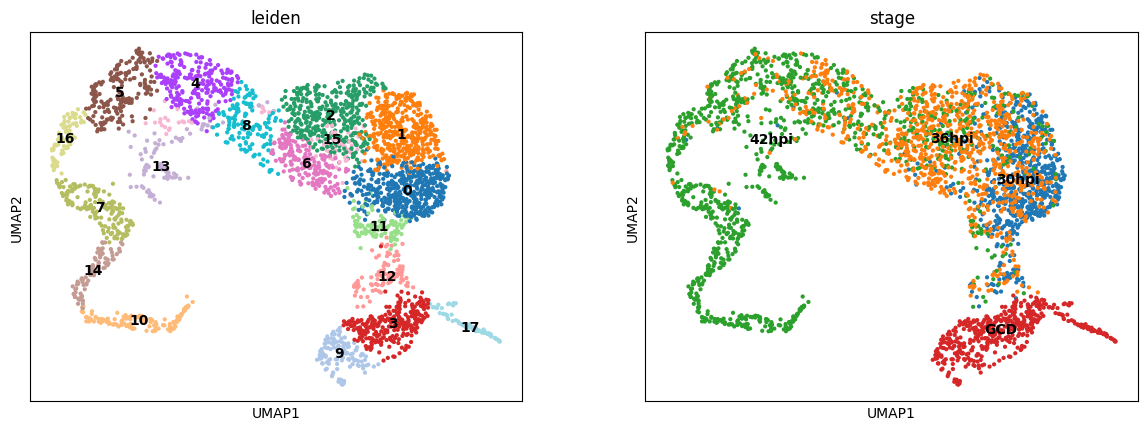

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df.iloc[:, :-1].values)
adata.obs['stage'] = df['stage'].values

# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage'], legend_loc='on data')


In [ ]:

adata = '/content/drive/MyDrive/final2_processed.csv'

# Read the CSV file using pandas
df1 = pd.read_csv(adata)
df1


,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100400,PF3D7_0100500,PF3D7_0100600,PF3D7_0100700,PF3D7_0100800,PF3D7_0100900,PF3D7_0101000,...,PF3D7_0511600,PF3D7_0511700,PF3D7_0511800,PF3D7_0511900,PF3D7_0512000,PF3D7_0512100,PF3D7_0512200,PF3D7_0512300,PF3D7_0512400,stage1
0,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.964260,0.0,3.092721,1.491362,0.0,0.000000,0.000000,T0
1,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.691965,0.0,2.440909,0.954243,0.0,0.000000,0.000000,T0
2,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.380392,0.0,2.821514,0.778151,0.0,0.000000,0.000000,T0
3,0.477121,0.0,0.69897,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.910624,0.0,0.477121,0.000000,0.0,0.000000,0.000000,T0
4,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.778151,0.0,2.690196,1.204120,0.0,0.000000,0.000000,T0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,3.424555,1.690196,0.0,0.000000,3.258637,T20
121,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.477121,0.0,0.301030,0.000000,0.0,0.000000,3.720986,T20
122,0.301030,0.0,0.00000,2.041393,0.60206,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.186108,0.0,0.000000,0.000000,0.0,0.477121,3.141136,T20
123,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.710117,0.0,0.000000,0.000000,0.0,0.000000,3.498999,T20


         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


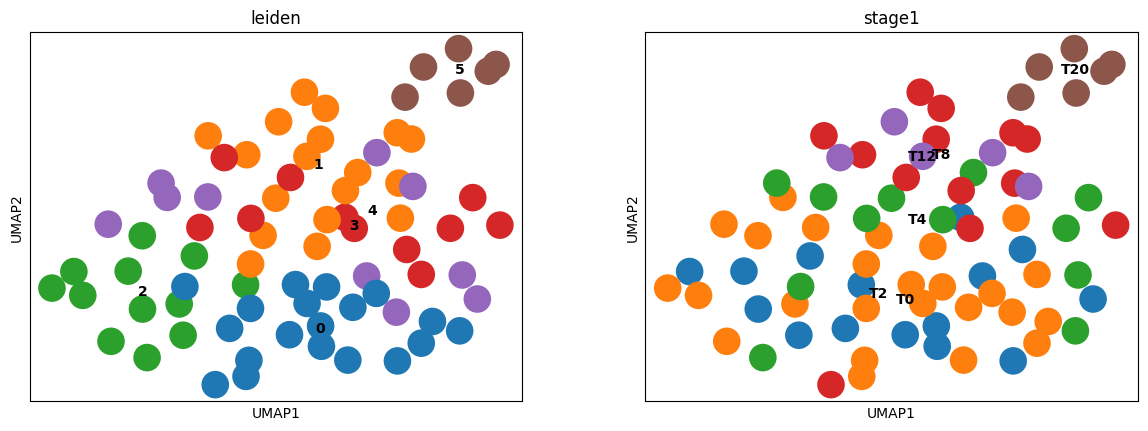

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df1.iloc[:, :-1].values)
adata.obs['stage1'] = df1['stage1'].values

# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage1'], legend_loc='on data')


In [ ]:

adata = '/content/drive/MyDrive/final38e.csv'

# Read the CSV file using pandas
df2 = pd.read_csv(adata)
df2


,Unnamed: 0,PF3D7-0100100,PF3D7-0100200,PF3D7-0100300,PF3D7-0100400,PF3D7-0100500,PF3D7-0100600,PF3D7-0100700,PF3D7-0100800,PF3D7-0100900,...,PF3D7-0310600.1,PF3D7-0313700.1,PF3D7-0313700.2,PF3D7-0208100.1,PF3D7-0208700.2,PF3D7-0208700.1,PF3D7-0219400.1,PF3D7-0219400.2,PF3D7-0107000.1,stage
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,ring
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,gametocyte
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,ring
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,gametocyte
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,ring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38630,38630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.314569,0.000000,0.0,0.0,0.0,0.000000,gametocyte
38631,38631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.080796,gametocyte
38632,38632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,gametocyte
38633,38633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,gametocyte


In [ ]:
column_names = df2.columns.tolist()

# Print the column names
print(column_names)

['Unnamed: 0', 'PF3D7-0100100', 'PF3D7-0100200', 'PF3D7-0100300', 'PF3D7-0100400', 'PF3D7-0100500', 'PF3D7-0100600', 'PF3D7-0100700', 'PF3D7-0100800', 'PF3D7-0100900', 'PF3D7-0101000', 'PF3D7-0101100', 'PF3D7-0101200', 'PF3D7-0101300', 'PF3D7-0101400', 'PF3D7-0101500', 'PF3D7-0101600', 'PF3D7-0101700', 'PF3D7-0101800', 'PF3D7-0101900', 'PF3D7-0102000', 'PF3D7-0102100', 'PF3D7-0102200', 'PF3D7-0102300', 'PF3D7-0102400', 'PF3D7-0102500', 'PF3D7-0102600', 'PF3D7-0102700', 'PF3D7-0102800', 'PF3D7-0102900', 'PF3D7-0103000', 'PF3D7-0103100', 'PF3D7-0103200', 'PF3D7-0103300', 'PF3D7-0103400', 'PF3D7-0103500', 'PF3D7-0103600', 'PF3D7-0103700', 'PF3D7-0103800', 'PF3D7-0103900', 'PF3D7-0104000', 'PF3D7-0104100', 'PF3D7-0104200', 'PF3D7-0104300', 'PF3D7-0104400', 'PF3D7-0104500', 'PF3D7-0104600', 'PF3D7-0104700', 'PF3D7-0104800', 'PF3D7-0104900', 'PF3D7-0105000', 'PF3D7-0105100', 'PF3D7-0105200', 'PF3D7-0105300', 'PF3D7-0105400.1', 'PF3D7-0105400.2', 'PF3D7-0105500', 'PF3D7-0105600', 'PF3D7-01057

In [ ]:
df2 = df2.drop(columns='Unnamed: 0', axis=1)

In [ ]:
column_names = df2.columns.tolist()

# Print the column names
print(column_names)

['PF3D7-0100100', 'PF3D7-0100200', 'PF3D7-0100300', 'PF3D7-0100400', 'PF3D7-0100500', 'PF3D7-0100600', 'PF3D7-0100700', 'PF3D7-0100800', 'PF3D7-0100900', 'PF3D7-0101000', 'PF3D7-0101100', 'PF3D7-0101200', 'PF3D7-0101300', 'PF3D7-0101400', 'PF3D7-0101500', 'PF3D7-0101600', 'PF3D7-0101700', 'PF3D7-0101800', 'PF3D7-0101900', 'PF3D7-0102000', 'PF3D7-0102100', 'PF3D7-0102200', 'PF3D7-0102300', 'PF3D7-0102400', 'PF3D7-0102500', 'PF3D7-0102600', 'PF3D7-0102700', 'PF3D7-0102800', 'PF3D7-0102900', 'PF3D7-0103000', 'PF3D7-0103100', 'PF3D7-0103200', 'PF3D7-0103300', 'PF3D7-0103400', 'PF3D7-0103500', 'PF3D7-0103600', 'PF3D7-0103700', 'PF3D7-0103800', 'PF3D7-0103900', 'PF3D7-0104000', 'PF3D7-0104100', 'PF3D7-0104200', 'PF3D7-0104300', 'PF3D7-0104400', 'PF3D7-0104500', 'PF3D7-0104600', 'PF3D7-0104700', 'PF3D7-0104800', 'PF3D7-0104900', 'PF3D7-0105000', 'PF3D7-0105100', 'PF3D7-0105200', 'PF3D7-0105300', 'PF3D7-0105400.1', 'PF3D7-0105400.2', 'PF3D7-0105500', 'PF3D7-0105600', 'PF3D7-0105700', 'PF3D7-01

In [ ]:
pip install leidenalg

         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


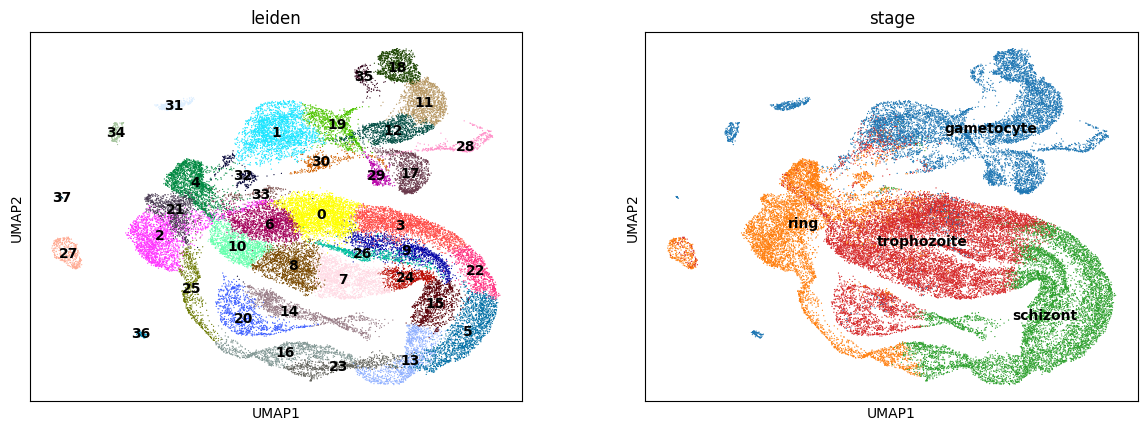

In [ ]:
import scanpy as sc
import pandas as pd

# Assuming your data is in a DataFrame named df
# Make sure to replace 'stage' with the actual column name for the developmental stage
adata = sc.AnnData(X=df2.iloc[:, :-1].values)
adata.obs['stage'] = df2['stage'].values

# Perform preprocessing (you can adjust this based on your specific needs)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Perform clustering and UMAP visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot UMAP with cell clusters for each stage
sc.pl.umap(adata, color=['leiden', 'stage'], legend_loc='on data')
